<h1>Importando os Dados</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

OldDataFrame = pd.read_csv('kc_house_data.csv', encoding='UTF-8', sep=";")
DataFrame = OldDataFrame.query('price <= 1000000')
DataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,2570",1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,"47,7210","-122,3190",1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,2330",2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,3930",1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,0450",1800,7503


<h3>A empresa, House Rocket, deseja obter infromações e o direcionamento de mercado de casas na cidade de King County, USA, para isto ela levantou as seguintes questões: </h3>
<h3> 
    <ol>
    <li>Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?</li>  <br>   
    <li>Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?</li>   <br>  
    <li> A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?</li>       
    </ol>
</h3>

<h6>Informações</h6>

sqft_basement = tamanho do porão

sqft_above = tamanho segundo andar

yr_built = ano de construção

yr_renovated = ano da reforma

# Observando casas reformadas para calcular sua valorização

In [2]:
Renovated = DataFrame[DataFrame['yr_renovated']!=0]
Unrenovated = DataFrame[DataFrame['yr_renovated']==0]

In [3]:
DataFrame.loc[:,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,2570",1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,"47,7210","-122,3190",1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,2330",2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,3930",1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,0450",1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,"47,6993","-122,3460",1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,"47,5107","-122,3620",1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,"47,5944","-122,2990",1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,"47,5345","-122,0690",1410,1287


In [4]:
Ren = Renovated['price'].mean()
Ren

544612.3682065217

In [5]:
Unr = Unrenovated['price'].mean()
Unr

464784.7875025757

In [6]:
print(Ren - Unr)

79827.580703946


<h3> Pelos passos acima podemos perceber que na média as casas reformadas são mais valorizadas que as casas sem reforma.
    
Sendo assim seria interessante o CEO reformar a casa antes de Vendê-la.
</h3>

<h3> Seguindo esta lógica, o recomendado seria o CEO comprar uma casa mais barata para reformar e revender.<br>
    
Primeiramente será analisada a casa que esteja entre as mais antigas e será verificado se esta resulta na casa mais barata, ou em um preço baixo.</h3>



# Buscando a casa mais antiga para comparar com o preço da mais barata

In [7]:
Cheaper = Unrenovated[Unrenovated['yr_built'] == Unrenovated['yr_built'].min()]
CheapestElderHouse = Cheaper[Cheaper['price'] == Cheaper['price'].min()]
print(CheapestElderHouse)
CheapestElderHouse['condition']

               id        date     price  bedrooms  bathrooms  sqft_living  \
14001  2354300456  2015-03-11  130000.0         2        1.0          600   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
14001      1500     1.0           0     0  ...      4         600   

       sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
14001              0      1900             0    98027  47,5289  -122,0330   

      sqft_living15  sqft_lot15  
14001          1130        6000  

[1 rows x 21 columns]


14001    4
Name: condition, dtype: int64

In [8]:
CheapestHouse = Unrenovated[Unrenovated['price'] == Unrenovated['price'].min()]
print(CheapestHouse)
CheapestHouse['condition']

              id        date    price  bedrooms  bathrooms  sqft_living  \
1149  3421079032  2015-02-17  75000.0         1        0.0          670   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149     43377     1.0           0     0  ...      3         670   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
1149              0      1966             0    98022  47,2638  -121,9060   

     sqft_living15  sqft_lot15  
1149          1160       42882  

[1 rows x 21 columns]


1149    3
Name: condition, dtype: int64

In [9]:
DataFrame.condition.mean()

3.4047548143736353

<h3> Diferente do esperado, nos resultados acima foi encontrada a casa mais antiga não renovada no valor de 130 mil, e também a mais barata encontrada no banco de dados, no valor de 75 mil.
    
    Analisando os preços pode-se dizer que não existe motivos evidentes para o CEO comprar a casa mais antiga, pois ambas casas tem o espaço de construção parecido (sqft_living) e apesar da casa de 75 mil estar numa condição pior e ter menos banheiros e quartos, isto pode ser solucionado na reforma, valorizando a casa, além de pagar 55 mil a menos. <br>
    
Apenas faria sentido comprar a casa antiga se fosse para uso imediato, sem pretensões de lucro, pois ela dispõe de uma melhor condição de moradia e recursos que a casa de 75 mil.
    
<br>
Sendo assim seria indicado que o CEO comprasse casas baratas no geral, entre 75 mil e 100mil, não importando muito com seu tempo de construção, uma vez que este não indica uma diminuição nos preços e nem com suas condições e itens como banheiros e quartos, uma vez que estes itens poderiam ser construidos numa reforma desde que o "sqft_lot" o possibilite.
</h3>

# Entendendo se o ZipCode impacta nos preços das casas

In [10]:
df = DataFrame.groupby('zipcode').mean()
df2 = DataFrame.groupby('zipcode').median()
df3 = DataFrame.groupby('zipcode').std()
ExpensiveZip = df[df['price'] == df['price'].max()]
print('ZipCode com casas mais caras em média', ExpensiveZip.index.values[0], 'valor médio', df['price'].max())

ZipCode com casas mais caras em média 98039 valor médio 900833.3333333334


In [11]:
CheapZip = df[df['price'] == df['price'].min()]
CheapZipmedian = df2[df2['price'] == df2['price'].min()]
CheapZipstd = df3[df3['price'] == df3['price'].min()]
generalMean = DataFrame['price'].mean()
generalMedian = DataFrame['price'].median()
generalstd = DataFrame['price'].std()
print('ZipCode com as casas de médias mais baratas fica no ',CheapZip.index.values,
      'valor médio de: %i' %(df['price'].min()))
print('média geral é de: %i' %(generalMean))
print('ZipCode com as casas de menor mediana fica no ',CheapZipmedian.index.values,
      'valor médio de: %i' %(df2['price'].min()))
print('média geral é de: %i' %(generalMedian))
print('ZipCode com as casas com menor desvio padrão fica no ',CheapZipstd.index.values,
      'valor médio de: %i' %(df3['price'].min()))
print('média geral é de: %i' %(generalstd))

ZipCode com as casas de médias mais baratas fica no  [98002] valor médio de: 234284
média geral é de: 467700
ZipCode com as casas de menor mediana fica no  [98002 98168] valor médio de: 235000
média geral é de: 434000
ZipCode com as casas com menor desvio padrão fica no  [98002] valor médio de: 52041
média geral é de: 196360


<h3> Outra variável que pode impactar o preço da casa é a localização, podemos análisar isso através da coluna "zipcode", e como visto anteriormente nos resultados seria interessante evitar o zipcode 98002, já que as medidas estatísticas apontam para um baixo valor das casas além de uma taxa de preço com pequenas variações, ou seja, muito provavelmente a localização tem grande impacto no valor da casa.<br>

<br>
Sabendo o valor médio das casas em King County, é possível afirmar que a reforma é uma boa estratégia, uma vez que o valor médio das casas reformadas, que é de 1.446.211.405, é maior que o valor médio das casas em geral e das casas não reformadas, como visto anteriormente.
</h3>

In [12]:
ID_Duplo = DataFrame[DataFrame['id'].duplicated(keep = False)]

ID_Duplo_Length = ID_Duplo.shape[0]

In [13]:
#CALCULANDO A VALORIZAÇÃO/DESVALORIZAÇÃO PELO TEMPO ENTRE OS IDS IGUAIS E SALVANDO OS VALORES EM meanProfit
meanProfit = []
for i in range(0, ID_Duplo_Length, 2):
    if(i+1 < ID_Duplo_Length):
        locActual = ID_Duplo.iloc[i,:]
        locProx = ID_Duplo.iloc[i+1,:]
        if(locActual.id == locProx.id):
            if locActual['date'] > locProx['date']:
                meanProfit.append(locActual['price']/locProx['price'])
            else:
                meanProfit.append(locProx['price']/locActual['price'])
        else:
            meanProfit.append(0)
    else:
        meanProfit.append(0)
        
#montando DataFrame com a valorização ou desvalorização dos imóveis
df_meanProfit = pd.DataFrame(meanProfit, columns = ['percentage'])    
df_meanProfit = df_meanProfit[df_meanProfit['percentage'] != 0]
#Passando de lista para DataFrame e retirando valores zerados

df_meanProfit.sort_values(by=['percentage'])

,percentage
114,0.945946
39,0.960686
6,0.976628
87,0.978000
131,0.990291
...,...
59,2.681707
83,2.764706
121,2.969697
139,3.308271


<h3> É possível perceber que existem algumas porcentagens atuando como outliers para cima, como um aumento de 718875.81%, quanto para baixo, como um "aumento" de 0.000084%, ou seja, uma diminuição. Sendo assim será removido tanto os 5 maiores quanto os 5 menores valores  </h3>

In [14]:
df_meanProfit.mean()

percentage    1.612801
dtype: float64

In [15]:
df_meanProfit.median()

percentage    1.592067
dtype: float64

In [16]:
df_meanProfit.mode()

,percentage
0,1.000000
1,1.238095


<AxesSubplot:title={'center':'Distribuição de Frequências - Acumulo dos valores dos calculos da valorização com o tempo'}, xlabel='Porcentagem de valorização', ylabel='Count'>

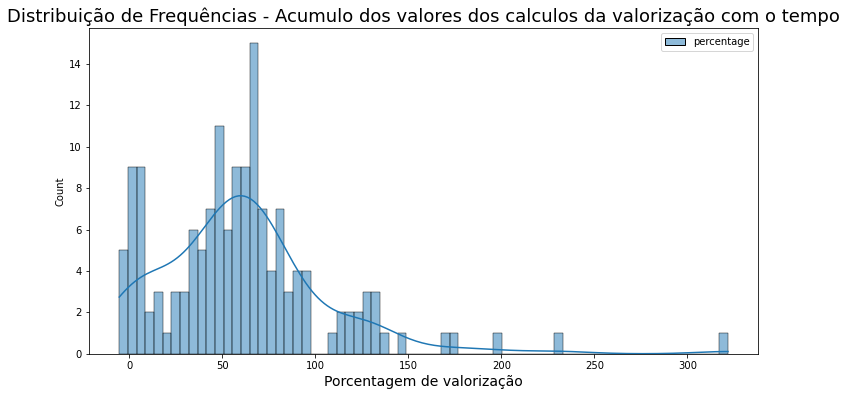

In [17]:
ax = sns.histplot((df_meanProfit-1)*100, bins = 70, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Acumulo dos valores dos calculos da valorização com o tempo', fontsize=18)
ax.set_xlabel('Porcentagem de valorização', fontsize=14)
ax

<h2> Pode-se inferir pelo resultado da média que as casas tendem a valorizar cerca de 25% com o tempo, porém se analisarmos a mediana, a moda e o gráfico acima, é possível observar que o maioria das casas tendem a desvalorizar com o tempo, uma vez que a mediana é menor que 1, ou seja, existe uma desvalorização na maioria das casas, o que também é possível de se observar no gráfico. Sendo assim, apenas esperar o tempo passar, não garantirá uma venda em um valor maior.
<br><br><br>
    Abaixo é explorado em qual mês o valor de venda é maior de acordo com os dados.
</h2>

In [18]:
DataFrame['date'] = pd.to_datetime(DataFrame['date'])
for i in range(12):
    meanMonth = DataFrame[DataFrame['date'].dt.month == i+1]
    print('a média de valor no mês', i+1, 'é de:', format(meanMonth['price'].mean(),'.1E'))

a média de valor no mês 1 é de: 4.5E+05
a média de valor no mês 2 é de: 4.5E+05
a média de valor no mês 3 é de: 4.7E+05
a média de valor no mês 4 é de: 4.9E+05
a média de valor no mês 5 é de: 4.7E+05
a média de valor no mês 6 é de: 4.8E+05
a média de valor no mês 7 é de: 4.7E+05
a média de valor no mês 8 é de: 4.7E+05
a média de valor no mês 9 é de: 4.7E+05
a média de valor no mês 10 é de: 4.6E+05
a média de valor no mês 11 é de: 4.5E+05
a média de valor no mês 12 é de: 4.5E+05


C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/970191112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['date'] = pd.to_datetime(DataFrame['date'])


C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/1353701225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month['month'] = data_month['date'].dt.month


<AxesSubplot:title={'center':'Média dos preços das casas de acordo com o mês'}, xlabel='Mês', ylabel='Preço em Bilhões'>

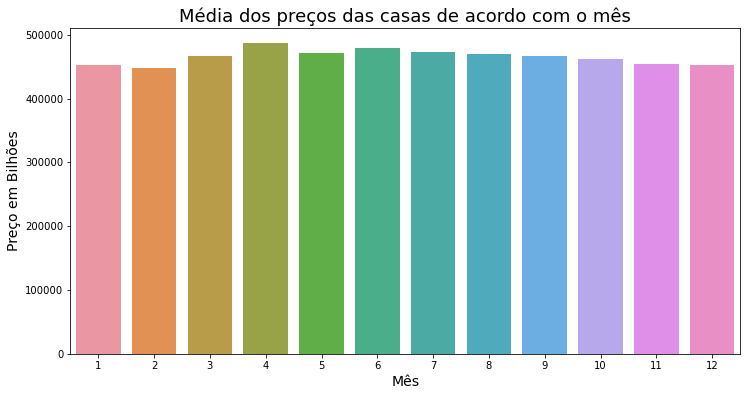

In [19]:
data_month = DataFrame
data_month['month'] = data_month['date'].dt.month


ax = sns.barplot(x = [i for i in range(1,13)], y =data_month.groupby('month').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o mês', fontsize=18)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)
ax

<h2> Vimos que o valor de vendas começa a aumentar em maio(5) atinge o auge em julho(7) e
em seguida os valores diminuem alcançando uma baixa em novembro(11), se igualando com vendas do primeiro semestre exceto abril(4).<br><br><br> Abaixo a análise a ser feita vai além dos meses mas também em qual ano foram feitas essas vendas.</h2>

In [20]:
for j in range(2014, 2016, 1):
    for i in range(12):
        meanMonth = DataFrame[DataFrame['date'].dt.month == i+1]
        meanMonthPerYear = meanMonth[meanMonth['date'].dt.year == j]
        print('a média de valor no mês', i+1, 'no ano de', j,'é de:', format(meanMonthPerYear['price'].mean(),'.1E'))

a média de valor no mês 1 no ano de 2014 é de: NAN
a média de valor no mês 2 no ano de 2014 é de: NAN
a média de valor no mês 3 no ano de 2014 é de: NAN
a média de valor no mês 4 no ano de 2014 é de: NAN
a média de valor no mês 5 no ano de 2014 é de: 4.7E+05
a média de valor no mês 6 no ano de 2014 é de: 4.8E+05
a média de valor no mês 7 no ano de 2014 é de: 4.7E+05
a média de valor no mês 8 no ano de 2014 é de: 4.7E+05
a média de valor no mês 9 no ano de 2014 é de: 4.7E+05
a média de valor no mês 10 no ano de 2014 é de: 4.6E+05
a média de valor no mês 11 no ano de 2014 é de: 4.5E+05
a média de valor no mês 12 no ano de 2014 é de: 4.5E+05
a média de valor no mês 1 no ano de 2015 é de: 4.5E+05
a média de valor no mês 2 no ano de 2015 é de: 4.5E+05
a média de valor no mês 3 no ano de 2015 é de: 4.7E+05
a média de valor no mês 4 no ano de 2015 é de: 4.9E+05
a média de valor no mês 5 no ano de 2015 é de: 4.7E+05
a média de valor no mês 6 no ano de 2015 é de: NAN
a média de valor no mês 7 n

In [21]:
data_month = DataFrame
data_month['year-month'] = (data_month['date'].dt.year).astype(str) + '/' + (data_month['date'].dt.month).astype(str)
label = data_month['year-month'].value_counts().index
label 

C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/1689871648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month['year-month'] = (data_month['date'].dt.year).astype(str) + '/' + (data_month['date'].dt.month).astype(str)


Index(['2015/4', '2014/7', '2014/6', '2014/8', '2014/10', '2015/3', '2014/9',
       '2014/5', '2014/12', '2014/11', '2015/2', '2015/1', '2015/5'],
      dtype='object')

In [22]:
label = ['2015/04', '2014/07', '2014/06', '2014/08', '2014/10', '2015/03', '2014/09',
       '2014/05', '2014/12', '2014/11', '2015/02', '2015/01', '2015/05']
label = sorted(label)
values = data_month.groupby('year-month').price.mean()

values.index

Index(['2014/10', '2014/11', '2014/12', '2014/5', '2014/6', '2014/7', '2014/8',
       '2014/9', '2015/1', '2015/2', '2015/3', '2015/4', '2015/5'],
      dtype='object', name='year-month')

<AxesSubplot:title={'center':'Média dos preços das casas de acordo com o mês e ano'}, xlabel='Ano / Mês', ylabel='Preço em Bilhões'>

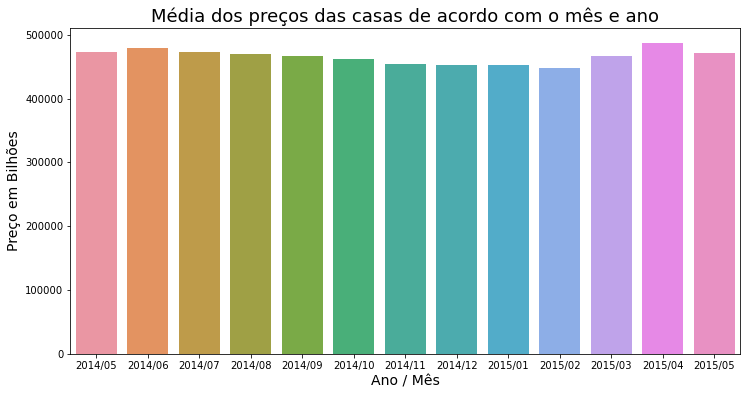

In [23]:
values.index = ['2014/10', '2014/11', '2014/12', '2014/05', '2014/06', '2014/07', '2014/08',
       '2014/09', '2015/01', '2015/02', '2015/03', '2015/04', '2015/05']

ax = sns.barplot(x = label , y = values.sort_index())
ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o mês e ano', fontsize=18)
ax.set_xlabel('Ano / Mês', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)
ax

<h2> Nesta análise vê-se que os dados confirmam a ideia de que as vendas a partir de julho tendem a ser maiores e também é possível inferir uma valorização nas casas de 2014 para 2015, desta forma uma estratégia de negócio seria esperar a valorização do imóvel de um ano para o outro, se esta for uma opção viável.<br><br><br> A análise abaixo busca compreender o impacto do número de banheiros no valor da casa.</h2>

In [24]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 100]
labels = [0, 1, 2, 3, 4, 5, 6, '7+']
df_bathrooms = DataFrame
df_bathrooms['frequencia'] =  pd.cut(x = df_bathrooms.bathrooms,
         bins = classes,
         labels = labels,
         include_lowest = True)
df_bathrooms[df_bathrooms['frequencia'] == 1].price.mean()

C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/2159553197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bathrooms['frequencia'] =  pd.cut(x = df_bathrooms.bathrooms,


390085.19155099575

Text(0, 0.5, 'Preço em 10 Bilhões')

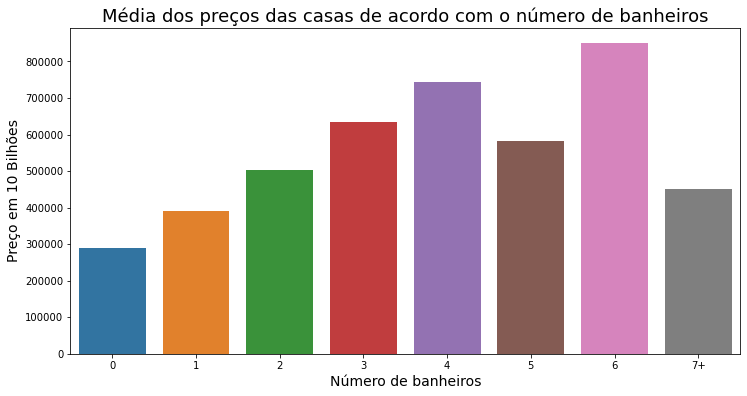

In [25]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 100 Milhões')

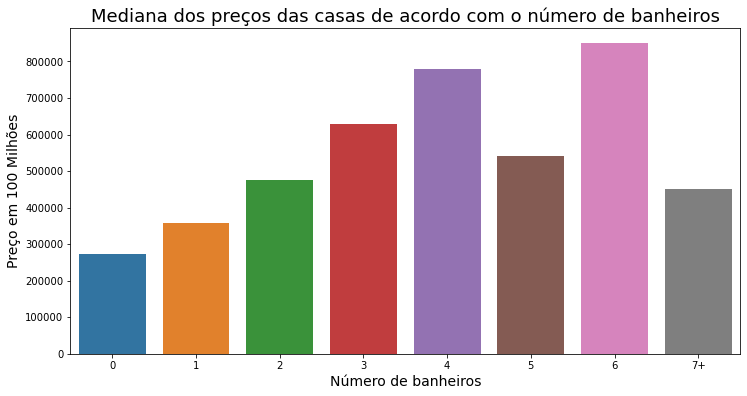

In [26]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço em 100 Milhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

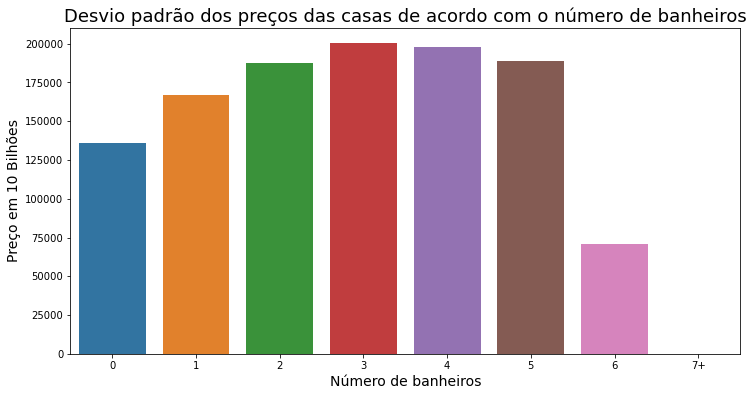

In [27]:
ax = sns.barplot(x = labels, y = df_bathrooms.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio padrão dos preços das casas de acordo com o número de banheiros', fontsize=18)
ax.set_xlabel('Número de banheiros', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Pode-se observar que o número de banheiros provavelmente não é a variável que mais afeta o preço das casas, porém é interessante analisar que as casas da classe 6 banheiros tem uma valorização alta.</h2>

<h2> As análises abaixo serão feitas de mesma forma, mas levará em conta o número de quartos, andares, fontes de água frontal e view(que eu assumi como vista para pontos turísticos ou então paisagens).</h2>

In [28]:
bedrooms = DataFrame['bedrooms'].value_counts().sort_index()
save = bedrooms.tolist()
#print(bedrooms)
for i in range(len(bedrooms)):
    if i == 12:
        meanVal = DataFrame[DataFrame['bedrooms'] == 33]
        print('a média de valor para', 33, 'quartos é de:', format(meanVal['price'].mean(),'.1E'))
        save[i] = (meanVal['price'].mean())
    else:    
        meanVal = DataFrame[DataFrame['bedrooms'] == i]
        print('a média de valor para', i, 'quarto(s) é de:', format(meanVal['price'].mean(),'.1E'))
        save[i] = (meanVal['price'].mean())

        
    
    

a média de valor para 0 quarto(s) é de: 2.7E+05
a média de valor para 1 quarto(s) é de: 3.1E+05
a média de valor para 2 quarto(s) é de: 3.9E+05
a média de valor para 3 quarto(s) é de: 4.3E+05
a média de valor para 4 quarto(s) é de: 5.3E+05
a média de valor para 5 quarto(s) é de: 5.7E+05
a média de valor para 6 quarto(s) é de: 5.7E+05
a média de valor para 7 quarto(s) é de: 6.2E+05
a média de valor para 8 quarto(s) é de: 5.9E+05
a média de valor para 9 quarto(s) é de: 6.7E+05
a média de valor para 10 quarto(s) é de: 6.6E+05
a média de valor para 11 quarto(s) é de: 5.2E+05
a média de valor para 33 quartos é de: 6.4E+05


In [29]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 100]
labels = [0, 1, 2, 3, 4, 5, 6, '7+']
df_bedrooms = DataFrame
df_bedrooms['frequencia'] =  pd.cut(x = df_bedrooms.bedrooms,
         bins = classes,
         labels = labels,
         include_lowest = True)
df_bathrooms[df_bathrooms['frequencia'] == 1].price.mean()

C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/1834681100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bedrooms['frequencia'] =  pd.cut(x = df_bedrooms.bedrooms,


312949.16161616164

Text(0, 0.5, 'Preço em 10 Bilhões')

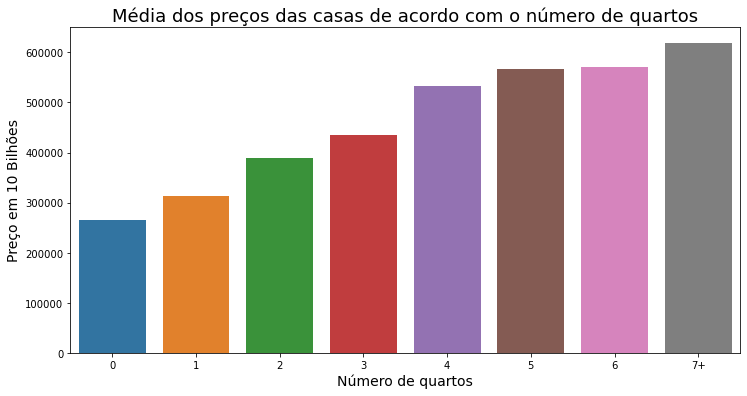

In [30]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço')

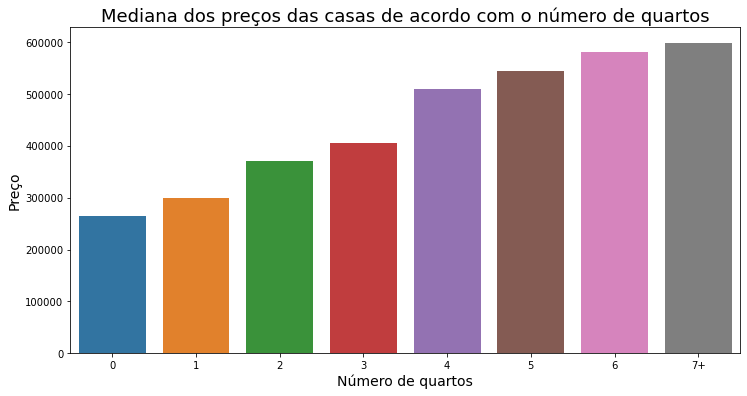

In [31]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

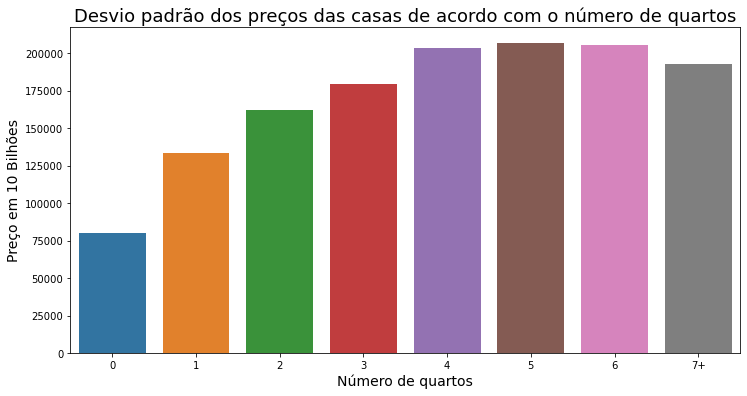

In [32]:
ax = sns.barplot(x = labels, y = df_bedrooms.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio padrão dos preços das casas de acordo com o número de quartos', fontsize=18)
ax.set_xlabel('Número de quartos', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Pela média é possível concluir que ter quartos é uma decisão ruim, o que me faz pensar que estes dados não são apenas de casas e sim de qualquer construção, incluindo edifícios para negócios. Entretanto, observando a mediana e desvio padrão podemos perceber que o aumento de quartos tende a aumentar a mediana e o desvio padrão em comparação com a média, sendo assim podemos concluir que o número de quartos influência o valor de uma casa, não de um edifício de negócio onde não existe a necessidade de um quarto. Sendo assim percebo que para analisar melhor a base de dados seria necessário separar as casas das demais construções.</h2>

In [33]:
floors = DataFrame['floors'].value_counts().sort_index()
save = floors.tolist()
#print(floors)
for i in range(len(floors)):
    meanVal = DataFrame[DataFrame['floors'] == ((i*0.5)+1)]
    print('a média de valor para', ((i*0.5)+1), 'andar(es) é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())


a média de valor para 1.0 andar(es) é de: 4.1E+05
a média de valor para 1.5 andar(es) é de: 5.1E+05
a média de valor para 2.0 andar(es) é de: 5.3E+05
a média de valor para 2.5 andar(es) é de: 6.3E+05
a média de valor para 3.0 andar(es) é de: 5.0E+05
a média de valor para 3.5 andar(es) é de: 5.1E+05


In [34]:
classes = [1, 1.99, 2.99, 100]
labels = [ 1, 2, '3+']
df_floors = DataFrame
df_floors['frequencia'] =  pd.cut(x = df_floors.floors,
         bins = classes,
         labels = labels,
         include_lowest = True)

C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/2460776139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_floors['frequencia'] =  pd.cut(x = df_floors.floors,


Text(0, 0.5, 'Preço em Bilhões')

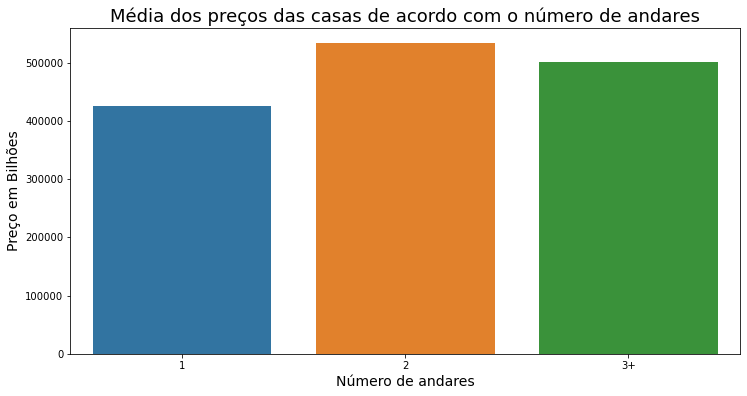

In [35]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)

Text(0, 0.5, 'Preço')

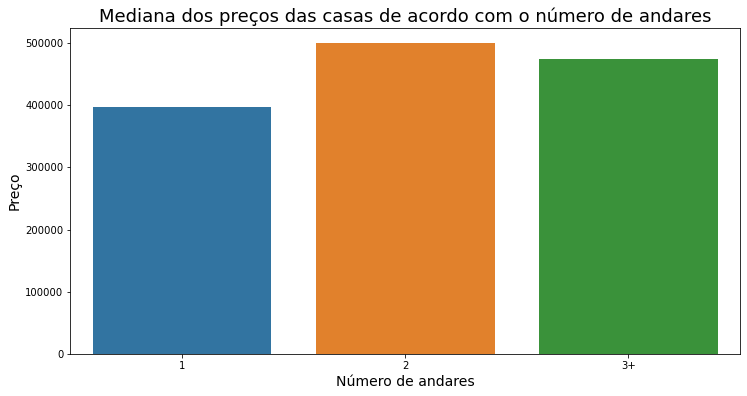

In [36]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

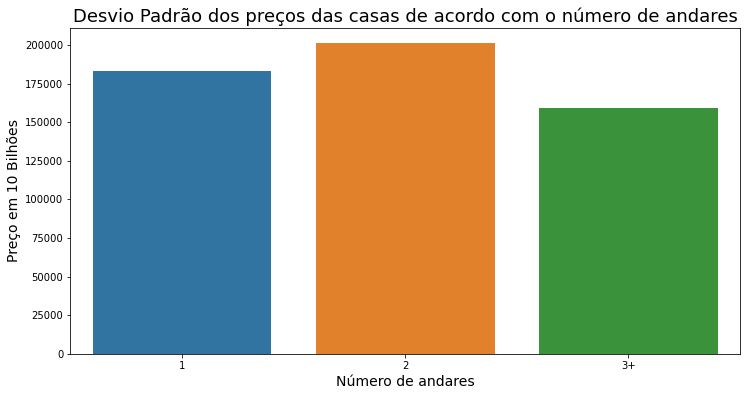

In [37]:
ax = sns.barplot(x = labels, y = df_floors.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com o número de andares', fontsize=18)
ax.set_xlabel('Número de andares', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Assim como nos dados sobre banheiros, nos dados de andares vemos que o ideal do imóvel é ter 2 andares, pois este se mantém em alta tanto na média quanto na mediana, porém como seu desvio padrão também é elevado, podemos concluir que não é somente a quantidade de andares que afetará o preço da casa ou edifício.</h2>

In [38]:
waterfront = DataFrame['waterfront'].value_counts().sort_index()
save = waterfront.tolist()
#print(waterfront)
for i in range(len(waterfront)):
    meanVal = DataFrame[DataFrame['waterfront'] == i]
    print('a média de valor para', i, 'fonte de água frontal é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())

a média de valor para 0 fonte de água frontal é de: 4.7E+05
a média de valor para 1 fonte de água frontal é de: 6.6E+05


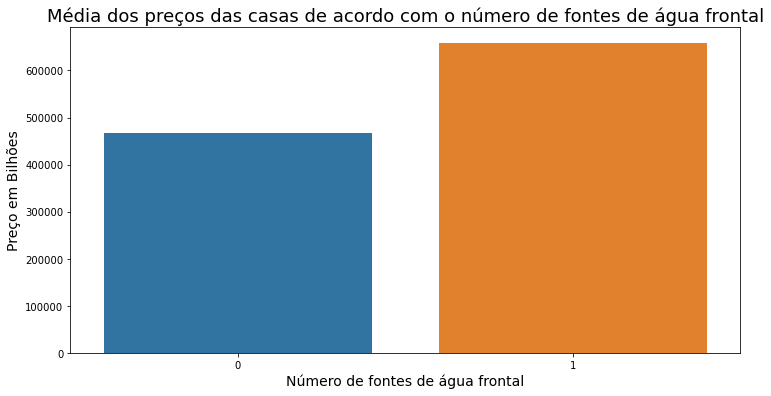

In [39]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)
print()

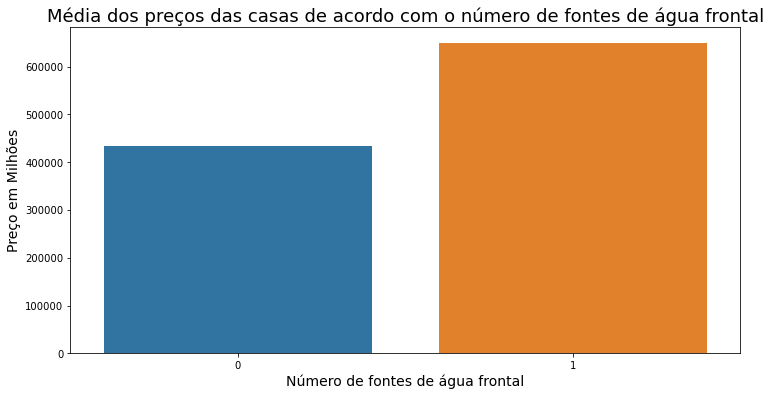

In [40]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço em Milhões', fontsize=14)
print()

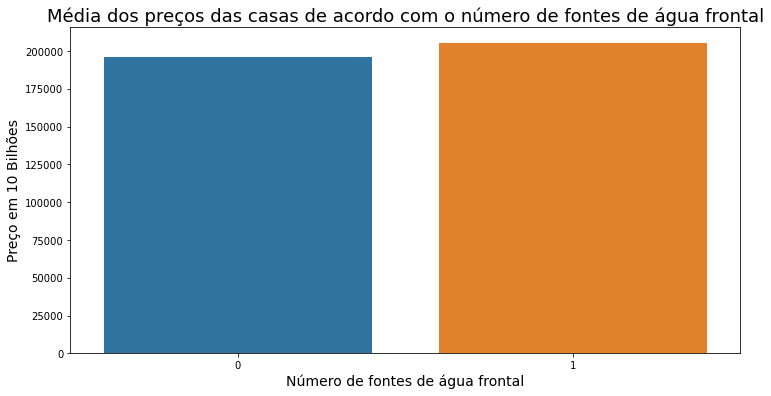

In [41]:
ax = sns.barplot(x = [0,1], y = df_floors.groupby('waterfront').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de fontes de água frontal', fontsize=18)
ax.set_xlabel('Número de fontes de água frontal', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)
print()

<h2> Sobre os resultados acima, vemos que com uma mediana na casa dos milhões e com o desvio padrão e média na casa dos bilhões podemos concluir que a fonte pode até influênciar o valor, mas certamente não é um fator principal neste quesito.</h2>

In [42]:
view = DataFrame['view'].value_counts().sort_index()
save = view.tolist()
#print(view)
for i in range(len(view)):
    meanVal = DataFrame[DataFrame['view'] == i]
    print('a média de valor para', i, 'vista(s) é de:', format(meanVal['price'].mean(),'.1E'))
    save[i] = (meanVal['price'].mean())

a média de valor para 0 vista(s) é de: 4.6E+05
a média de valor para 1 vista(s) é de: 6.1E+05
a média de valor para 2 vista(s) é de: 6.0E+05
a média de valor para 3 vista(s) é de: 6.2E+05
a média de valor para 4 vista(s) é de: 7.3E+05


In [43]:
classes = [0, 0.99, 1.99, 2.99, 3.99, 100]
labels = [ 0, 1, 2, 3, '4+']
df_view = DataFrame
df_view['frequencia'] =  pd.cut(x = df_view.view,
         bins = classes,
         labels = labels,
         include_lowest = True)

C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/1444613015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view['frequencia'] =  pd.cut(x = df_view.view,


Text(0, 0.5, 'Preço em Bilhões')

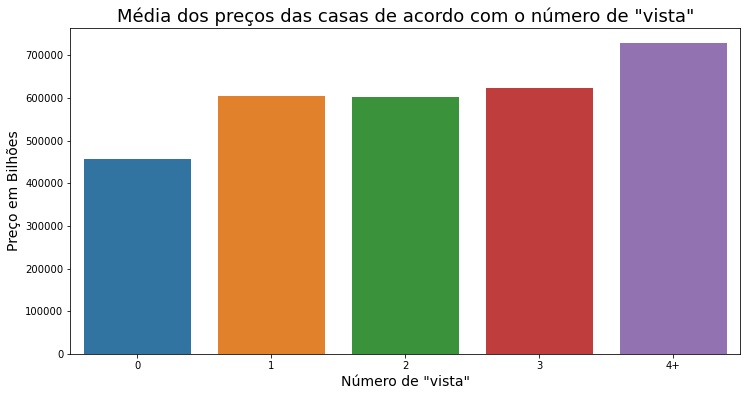

In [44]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em Milhões')

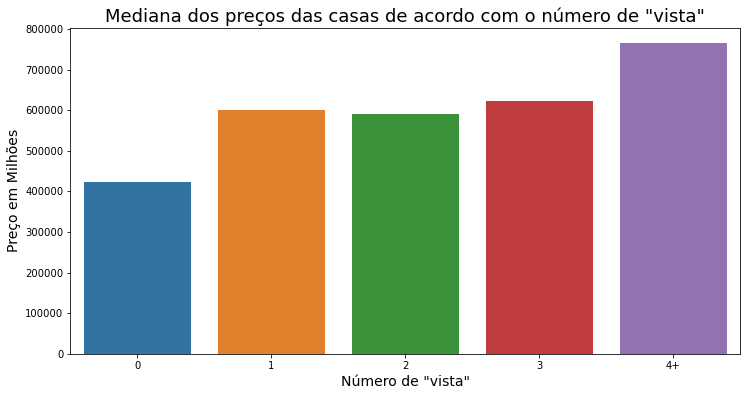

In [45]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em Milhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

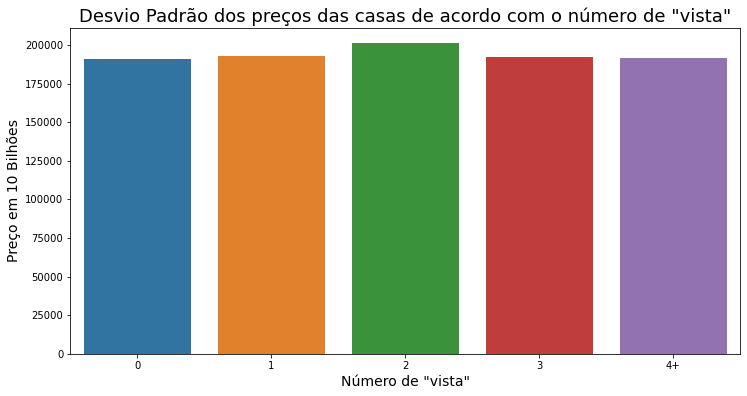

In [46]:
ax = sns.barplot(x = labels, y = df_view.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h2> Pelos dados acima pode-se dizer que é interessante para a empresa observar quais casas possuem uma(1) vista no mínimo e de preferência 4 vistas. Isso se dá por conta da média e mediana crescente de acordo com o n° de vistas, porém o desvio padrão é muito alto. Sendo assim, a vista afeta o preço, porém não é garantia de uma valorização gigantesca na casa.</h2>


<br>
<br>
<br>

<h2>Respondendo as perguntas do início:</h2>

In [47]:
classes = [0, 2000, 4000, 6000, 8000, 100000]
labels = [ '0-2000', '2000-4000', '4000-6000', '6000-8000', '8000+']

df_sqf = DataFrame
df_sqf['frequencia'] = pd.cut(x = df_sqf.sqft_living,
         bins = classes,
         labels = labels,
         include_lowest = True)

C:\Users\nethe\AppData\Local\Temp/ipykernel_13724/3278992763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sqf['frequencia'] = pd.cut(x = df_sqf.sqft_living,


Text(0, 0.5, 'Preço em 10 Bilhões')

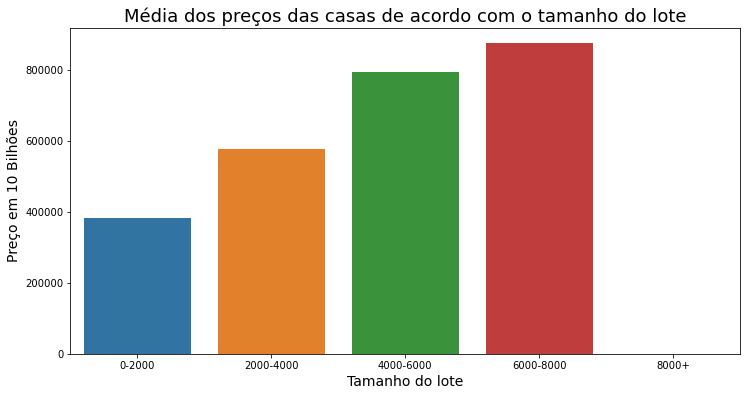

In [48]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.mean())

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o tamanho do lote', fontsize=18)
ax.set_xlabel('Tamanho do lote', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

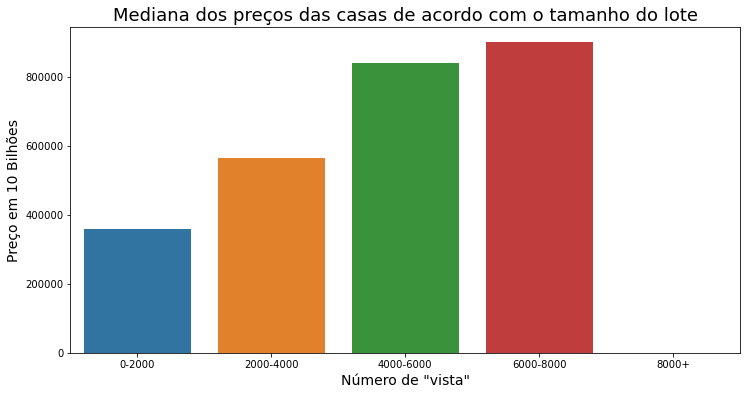

In [49]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.median())

ax.figure.set_size_inches(12, 6)
ax.set_title('Mediana dos preços das casas de acordo com o tamanho do lote', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

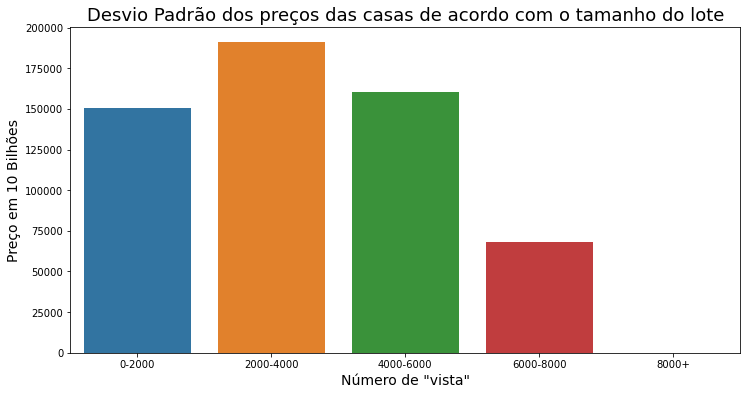

In [50]:
ax = sns.barplot(x = labels, y = df_sqf.groupby('frequencia').price.std())

ax.figure.set_size_inches(12, 6)
ax.set_title('Desvio Padrão dos preços das casas de acordo com o tamanho do lote', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

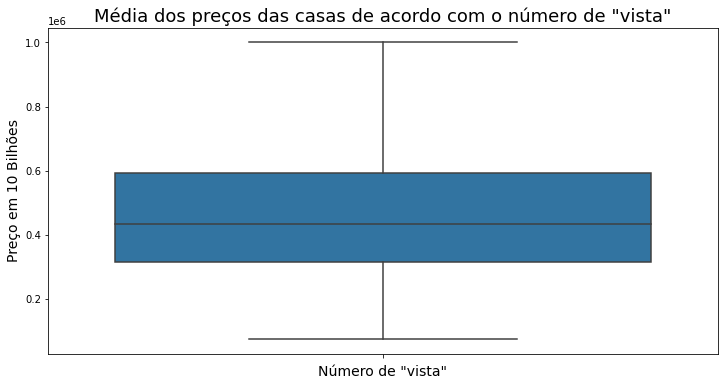

In [51]:
ax = sns.boxplot(y = DataFrame.price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

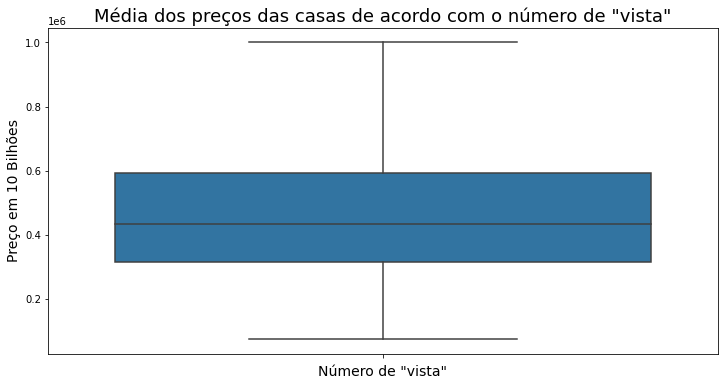

In [52]:
ax = sns.boxplot(y = DataFrame.query('price < 1000000').price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h1>Dado os boxplots, é notada a presença de diversos outliers que distorcem as informações. Sendo assim, o projeto será refatorado dividindo as bases em duas bases de dados, Casas e Casas de Luxo.</h1>

In [53]:
DataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year-month,frequencia
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,"47,5112","-122,2570",1340,5650,10,2014/10,0-2000
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,"47,7210","-122,3190",1690,7639,12,2014/12,2000-4000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,"47,7379","-122,2330",2720,8062,2,2015/2,0-2000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,"47,5208","-122,3930",1360,5000,12,2014/12,0-2000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,"47,6168","-122,0450",1800,7503,2,2015/2,0-2000


In [54]:
lista_drop = ['id', 'price', 'date', 'sqft_living', 'sqft_above','sqft_lot', 'lat', 'long','sqft_living15', 'sqft_lot15',\
              'sqft_basement', 'frequencia', 'month', 'year-month', 'zipcode', 'yr_built']
df = DataFrame.drop(lista_drop, axis = 1) # valores para classificação
filt = []
filt = df['yr_renovated'] != 0
df['Renovated'] = filt
df.drop(['yr_renovated'], axis = 1,inplace = True)
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Renovated
0,3,1.00,1.0,0,0,3,7,False
1,3,2.25,2.0,0,0,3,7,True
2,2,1.00,1.0,0,0,3,6,False
3,4,3.00,1.0,0,0,5,7,False
4,3,2.00,1.0,0,0,3,8,False
...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,False
21609,4,2.50,2.0,0,0,3,8,False
21610,2,0.75,2.0,0,0,3,7,False
21611,3,2.50,2.0,0,0,3,8,False


In [55]:
df.Renovated.value_counts()

False    19412
True       736
Name: Renovated, dtype: int64

In [56]:
Price = DataFrame.price # Preço

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
X_train, X_test, y_train, y_test = \
  train_test_split(df,
                   Price,
                   test_size=0.33, 
                   random_state=42)
X_train

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Renovated
1814,3,2.50,1.0,0,0,3,8,False
8037,5,1.50,1.5,0,0,3,8,False
6789,3,2.00,1.0,0,0,3,8,False
4005,3,1.75,1.0,0,0,4,7,False
18160,4,2.00,1.0,0,0,3,7,False
...,...,...,...,...,...,...,...,...
12068,4,2.00,1.0,0,0,5,8,False
12791,2,1.00,1.0,0,0,3,7,False
5767,4,2.00,1.5,0,0,4,8,False
920,3,2.00,1.0,0,0,3,7,False


In [138]:
X_test.sample(1)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Renovated
13214,3,1.0,1.0,0,0,3,7,True


In [71]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier()
MLPC.fit(X_train, y_train)
MLPC_stats = MLPC.score(X_test, y_test)
print(MLPC_stats)
resolutionMLPC = MLPC.predict(X_test)
resMLPC = pd.DataFrame(resolutionMLPC, index = X_test.index.tolist())
dfrealresMLPC = pd.DataFrame(y_test)
resultMLPC = pd.concat([dfrealresMLPC, resMLPC], axis=1, ignore_index=True)
#a= np.array(resultMLPC[1]).tolist()
#print(a[:420])
resultMLPC = resultMLPC.sort_values(by= 0, ascending=True)
resultMLPC = resultMLPC.rename(columns = {0: 'OriginalPrice', 1: 'MLPrice'}, inplace = False)
botTopML = resultMLPC.sort_values(by= 'MLPrice', ascending=True)
print(resultMLPC)#bot 5 e top 5 pela nota do enem
print(botTopML)#bot 5 e top 5 pelo machine learning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.005564746578432847
       OriginalPrice   MLPrice
1149         75000.0   90000.0
8274         82000.0  225000.0
5866         89000.0  230000.0
3108         89950.0  106000.0
10770        92000.0   90000.0
...              ...       ...
5689       1000000.0  875000.0
2653       1000000.0  472000.0
15431      1000000.0  834500.0
4959       1000000.0  995000.0
3252       1000000.0  835000.0

[6649 rows x 2 columns]
       OriginalPrice    MLPrice
13628       105500.0    78000.0
16619       338500.0    82500.0
9549        275000.0    82500.0
1149         75000.0    90000.0
13072       155000.0    90000.0
...              ...        ...
15988       825000.0   999950.0
15211       915000.0   999950.0
62          505000.0   999950.0
15006       535000.0  1000000.0
8469        695000.0  1000000.0

[6649 rows x 2 columns]


In [72]:
abs(botTopML.diff(axis = 1).MLPrice).mean()

142222.97623702814

In [73]:
abs(botTopML.diff(axis = 1).MLPrice).std()

120059.67225611908

In [74]:
abs(botTopML.diff(axis = 1).MLPrice).median()

114550.0

In [75]:
botTopML.head(1000)

,OriginalPrice,MLPrice
13628,105500.0,78000.0
16619,338500.0,82500.0
9549,275000.0,82500.0
1149,75000.0,90000.0
13072,155000.0,90000.0
...,...,...
1022,375000.0,245000.0
1668,550000.0,245000.0
11549,290000.0,245000.0
18937,291000.0,245000.0


In [84]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
LR_stats = LR.score(X_test, y_test)
print(LR_stats)
resolutionLR = LR.predict(X_test)
resLR = pd.DataFrame(resolutionLR, index = X_test.index.tolist())
dfresLR = pd.DataFrame(y_test)
resultLR = pd.concat([dfresLR, resLR], axis=1, ignore_index=True)
resultLR = resultLR.sort_values(by= 0, ascending=True)
resultLR = resultLR.rename(columns = {0: 'OriginalPrice', 1: 'MLPrice'}, inplace = False)
botTopMLLR = resultLR.sort_values(by= 'MLPrice', ascending=True)
print(resultLR)#bot 5 e top 5 pela nota do enem
print(botTopMLLR)#bot 5 e top 5 pelo machine learning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.009775906151300948
       OriginalPrice   MLPrice
1149         75000.0  175000.0
8274         82000.0  250000.0
5866         89000.0  230000.0
3108         89950.0  190000.0
10770        92000.0  250000.0
...              ...       ...
5689       1000000.0  650000.0
2653       1000000.0  800000.0
15431      1000000.0  649000.0
4959       1000000.0  850000.0
3252       1000000.0  995000.0

[6649 rows x 2 columns]
       OriginalPrice    MLPrice
15712       150000.0   120000.0
15540       135000.0   160000.0
9831        204950.0   170000.0
10481       484000.0   170000.0
11674       255000.0   170000.0
...              ...        ...
13907       925000.0   995000.0
9325        960000.0   995000.0
3615        870000.0   995000.0
3252       1000000.0   995000.0
16171       960000.0  1000000.0

[6649 rows x 2 columns]


In [85]:
abs(botTopMLLR.diff(axis = 1).MLPrice).mean()

124859.95518123027

In [86]:
abs(botTopMLLR.diff(axis = 1).MLPrice).std()

100245.20356897324

In [87]:
abs(botTopMLLR.diff(axis = 1).MLPrice).median()

101000.0

In [92]:
botTopMLLR.head(15)

,OriginalPrice,MLPrice
15712,150000.0,120000.0
15540,135000.0,160000.0
9831,204950.0,170000.0
10481,484000.0,170000.0
11674,255000.0,170000.0
1149,75000.0,175000.0
19121,182000.0,175000.0
17603,124000.0,175000.0
15131,135000.0,175000.0
3629,510000.0,175000.0


In [93]:
botTopMLLR

,OriginalPrice,MLPrice
15712,150000.0,120000.0
15540,135000.0,160000.0
9831,204950.0,170000.0
10481,484000.0,170000.0
11674,255000.0,170000.0
...,...,...
13907,925000.0,995000.0
9325,960000.0,995000.0
3615,870000.0,995000.0
3252,1000000.0,995000.0


In [94]:
botTopML

,OriginalPrice,MLPrice
13628,105500.0,78000.0
16619,338500.0,82500.0
9549,275000.0,82500.0
1149,75000.0,90000.0
13072,155000.0,90000.0
...,...,...
15988,825000.0,999950.0
15211,915000.0,999950.0
62,505000.0,999950.0
15006,535000.0,1000000.0


In [98]:
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,Renovated
0,3,1.00,1.0,0,0,3,7,False
1,3,2.25,2.0,0,0,3,7,True
2,2,1.00,1.0,0,0,3,6,False
3,4,3.00,1.0,0,0,5,7,False
4,3,2.00,1.0,0,0,3,8,False
...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,False
21609,4,2.50,2.0,0,0,3,8,False
21610,2,0.75,2.0,0,0,3,7,False
21611,3,2.50,2.0,0,0,3,8,False


In [111]:
quartos = []
for quarto in df.bedrooms.unique():
    quartos.append(quarto)
quartos

[3, 2, 4, 5, 1, 6, 7, 8, 0, 9, 11, 10, 33]

In [112]:
banheiros = []
for banheiro in df.bathrooms.unique():
    banheiros.append(banheiro)
banheiros

[1.0,
 2.25,
 3.0,
 2.0,
 1.5,
 2.5,
 1.75,
 2.75,
 3.25,
 4.0,
 3.5,
 0.75,
 4.25,
 1.25,
 4.5,
 3.75,
 0.0,
 4.75,
 5.0,
 0.5,
 6.75,
 5.25,
 7.5,
 5.5,
 5.75,
 6.0]

In [113]:
andares = []
for andar in df.floors.unique():
    andares.append(andar)
andares

[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]

In [114]:
fontes = []
for fonte in df.waterfront.unique():
    fontes.append(fonte)
fontes

[0, 1]

In [116]:
vistas = []
for vista in df.view.unique():
    vistas.append(vista)
vistas

[0, 3, 4, 2, 1]

In [115]:
condicoes = []
for condicao in df.condition.unique():
    condicoes.append(condicao)
condicoes

[3, 5, 4, 1, 2]

In [119]:
avaliacoes = []
for avaliacao in df.grade.unique():
    avaliacoes.append(avaliacao)
avaliacoes

[7, 6, 8, 9, 5, 10, 4, 11, 3, 12, 1]

In [120]:
reformadas = []
for reformada in df.Renovated.unique():
    reformadas.append(reformada)
reformadas

[False, True]

In [139]:
dcnr = {'quartos' : quartos, 'banheiros' : banheiros, 'andares' : andares, 'fontes': fontes, 'vistas' : vistas, 
        'condicoes' : condicoes, 'avaliacoes' : avaliacoes, 'reformadas' : reformadas}
dcnr

{'quartos': [3, 2, 4, 5, 1, 6, 7, 8, 0, 9, 11, 10, 33],
 'banheiros': [1.0,
  2.25,
  3.0,
  2.0,
  1.5,
  2.5,
  1.75,
  2.75,
  3.25,
  4.0,
  3.5,
  0.75,
  4.25,
  1.25,
  4.5,
  3.75,
  0.0,
  4.75,
  5.0,
  0.5,
  6.75,
  5.25,
  7.5,
  5.5,
  5.75,
  6.0],
 'andares': [1.0, 2.0, 1.5, 3.0, 2.5, 3.5],
 'fontes': [0, 1],
 'vistas': [0, 3, 4, 2, 1],
 'condicoes': [3, 5, 4, 1, 2],
 'avaliacoes': [7, 6, 8, 9, 5, 10, 4, 11, 3, 12, 1],
 'reformadas': [False, True]}

In [165]:

for item in dcnr:
    print(dcnr[item][0])

3
1.0
1.0
0
0
3
7
False


In [166]:
arr = np.array([[3,1.0,1.0,0,0,3,7,False]])
pred = pd.DataFrame(arr, columns = ['bedrooms','bathrooms','floors', 'waterfront', 'view', 'condition', 'grade','Renovated'])

[[3. 1. 1. 0. 0. 3. 7. 0.]]


In [163]:
MLPC.predict(pred)

array([225000.])

In [172]:
cesta_frutas = {'pera':[10,5], 'uva':[2, 8], 'maça':55, 'abacaxi':25, 'laranja':15}
print(cesta_frutas)

{'pera': [10, 5], 'uva': [2, 8], 'maça': 55, 'abacaxi': 25, 'laranja': 15}


In [179]:
for fruta, qtd in cesta_frutas.items():
    print(fruta +": "+str(qtd))

pera: [10, 5]
uva: [2, 8]
maça: 55
abacaxi: 25
laranja: 15
